Consider this MA(1) model

Consider this model

Consider this ARMA(1,1) model

Consider the ARMA(p,q) model

Use the dataset xyseries

Use the dataset TTM

From the fred, download this

Show that the observed returns have a correlation structure

In [162]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import matplotlib.pyplot as plt
import datetime

In [3]:
xyfile = "data/xyseries.xlsx"
xyseries = pd.read_excel(xyfile,index_col=0, parse_dates=True)

/var/folders/gh/frrz067s4bn8n48ddtrfcgx00000gn/T/ipykernel_5157/3263812269.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  xyseries = pd.read_excel(file,index_col=0, parse_dates=True)


In [4]:
xyseries

,Y
X,
11.034430,0.239293
11.107354,0.962884
9.914969,-2.124441
9.911697,-1.972051
10.887862,-1.759939
...,...
11.581292,1.069054
12.734498,-1.463218
11.569178,3.013655


In [26]:
xyseries['X'] = xyseries.index
X = xyseries[['X']]
Y = xyseries[['Y']]

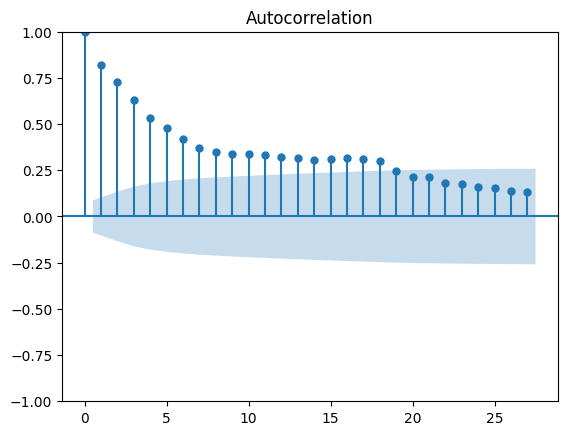

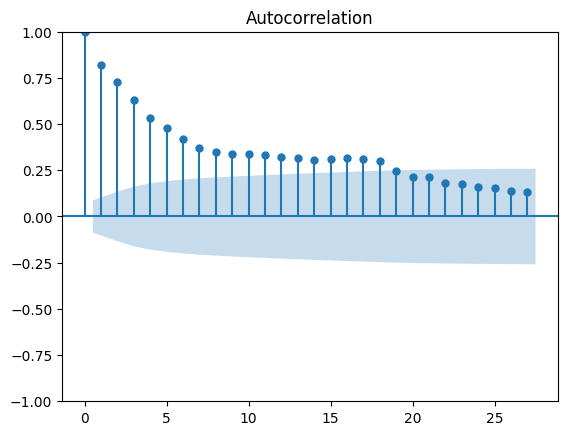

In [31]:
plot_acf(X)

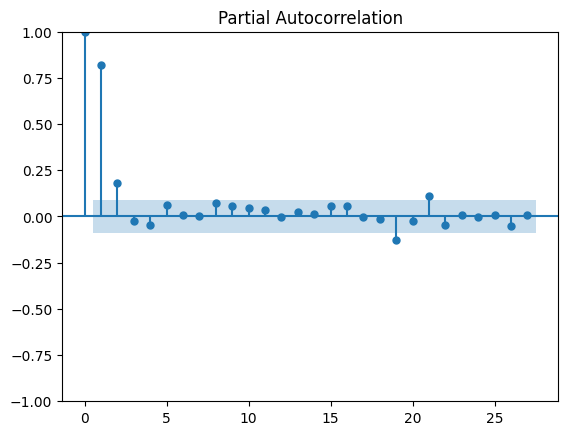

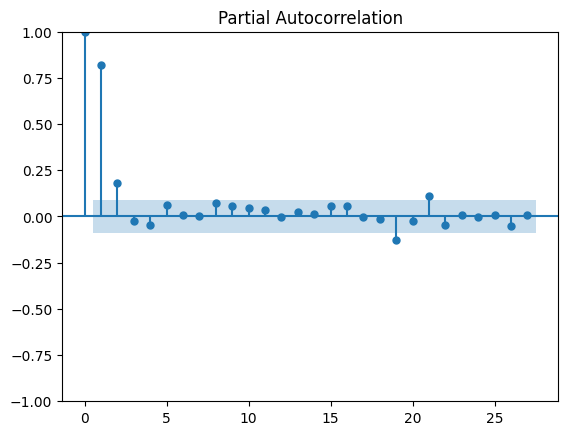

In [32]:
plot_pacf(X)

In [122]:
arxmodel = AutoReg(X['X'], lags=3).fit()

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [123]:
arxmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      X   No. Observations:                  500
Model:                     AutoReg(3)   Log Likelihood                -700.293
Method:               Conditional MLE   S.D. of innovations              0.990
Date:                Wed, 21 Jan 2026   AIC                           1410.586
Time:                        16:33:01   BIC                           1431.629
Sample:                             3   HQIC                          1418.845
                                  500                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5456      0.286      5.403      0.000       0.985       2.106
X.L1           0.6781      0.045     15.104      0.000       0.590       0.766
X.L2           0.2019      0.053      3.778      0.000       0.097       0.307
X.L3          -0.0288      0.045     -0.640      0.522      -0.117       0.059
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1470           +0.0000j            1.1470            0.0000
AR.2           -3.3031           +0.0000j            3.3031            0.5000
AR.3            9.1760           +0.0000j            9.1760            0.0000
-----------------------------------------------------------------------------
"""

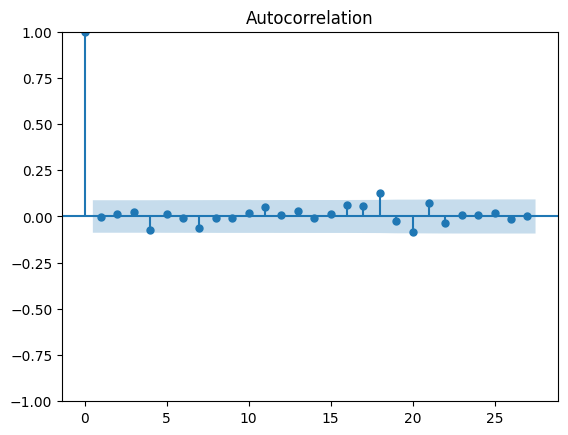

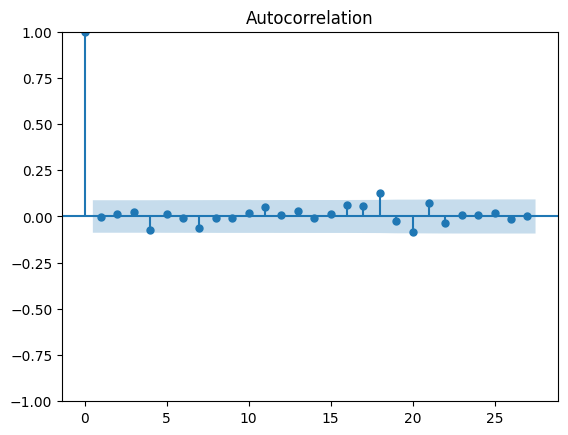

In [124]:
plot_acf(arxmodel.resid)

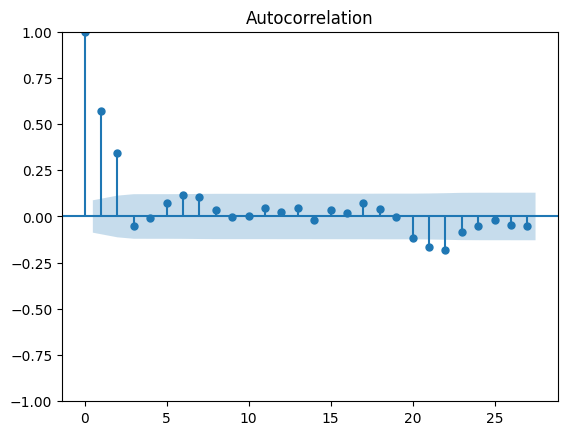

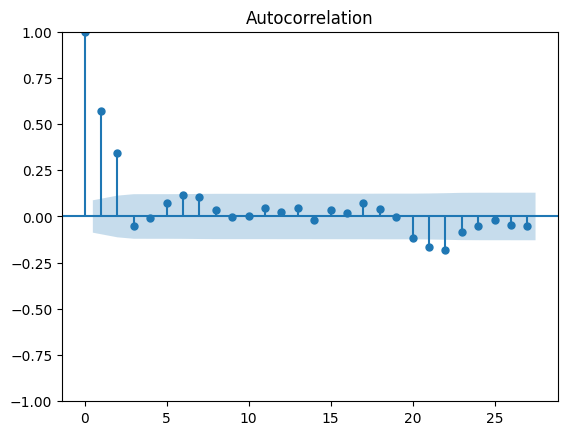

In [125]:
plot_acf(Y)

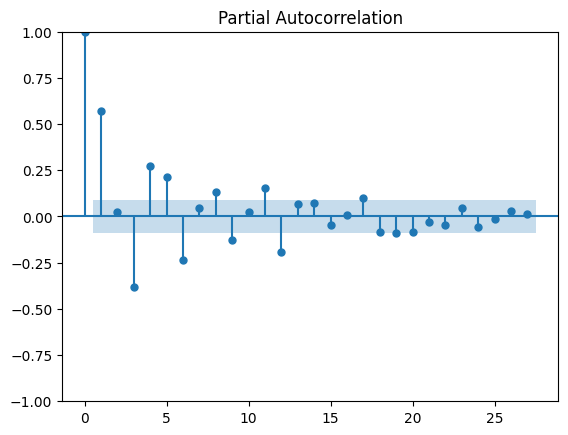

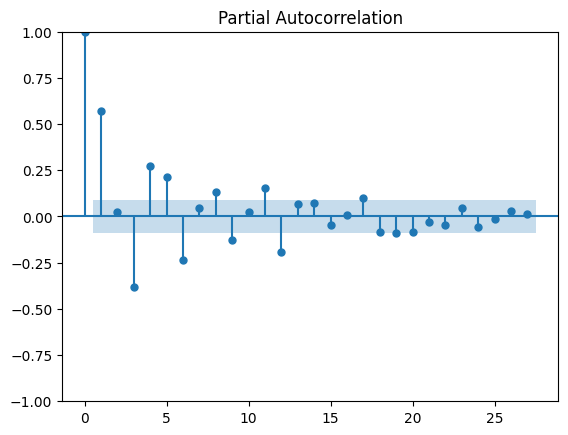

In [126]:
plot_pacf(Y)

In [127]:
maymodel = ARIMA(Y['Y'], order = (0,0,2)).fit()

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


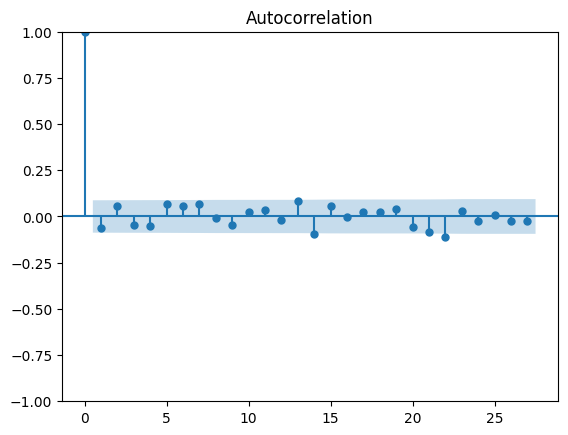

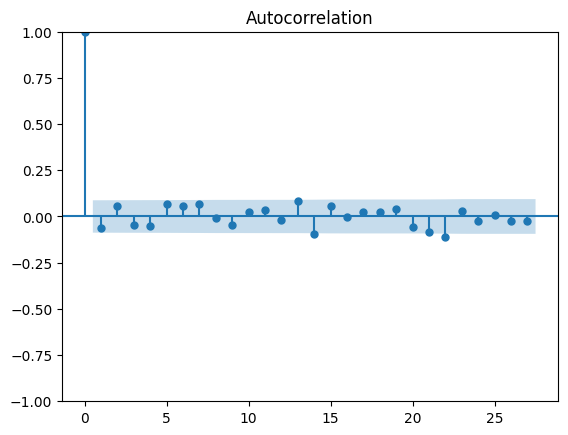

In [128]:
plot_acf(maymodel.resid)

In [129]:
ttmfile = "data/ttm.xlsx"
TTM = pd.read_excel(ttmfile, index_col=0, parse_dates=True)

In [130]:
TTM['RETURNS'] = TTM['PRICE'].pct_change()

In [131]:
TTM = TTM.dropna()

In [168]:
TTM.index = pd.to_datetime(
    TTM.index.astype(str) + " " + TTM["TIME_M"].astype(str),
    format='mixed'
)

In [172]:
TTM = TTM.drop(columns=TTM[['TIME_M']])

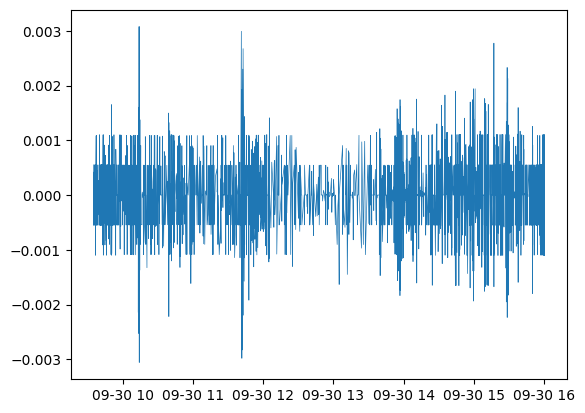

In [192]:
plt.plot(TTM.index, TTM['RETURNS'], linewidth=.5)

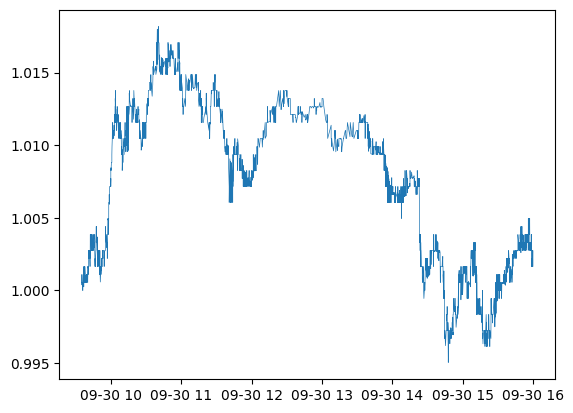

In [174]:
plt.plot(TTM.index, (1+TTM['RETURNS']).cumprod(), linewidth=.5)

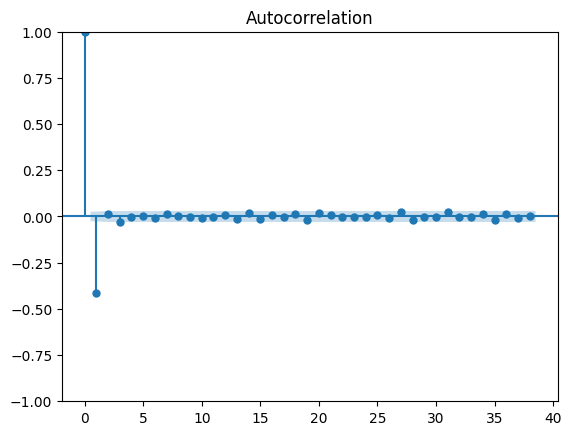

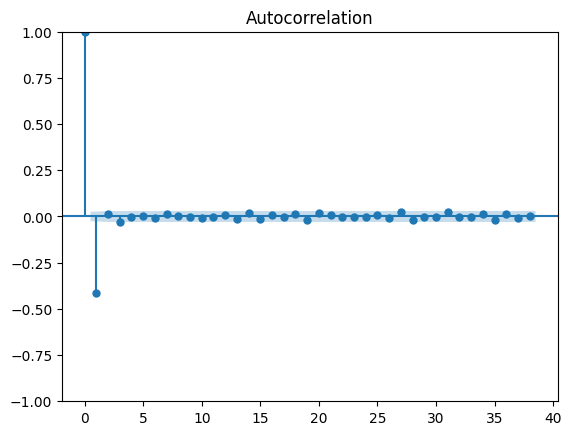

In [178]:
plot_acf(TTM['RETURNS'])

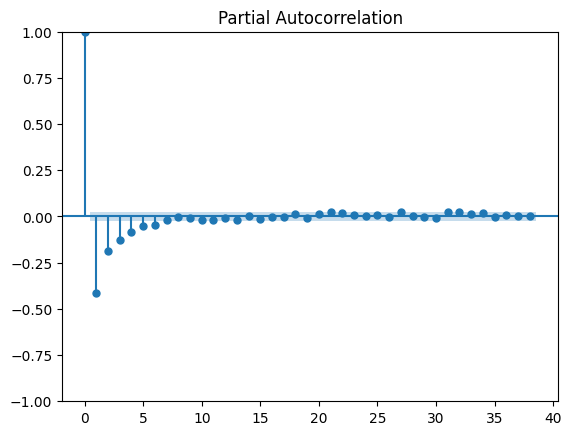

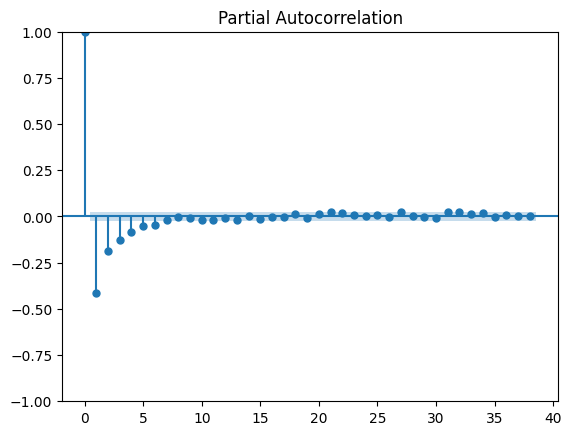

In [179]:
plot_pacf(TTM['RETURNS'])

In [ ]:
ma1model = ARIMA(TTM['RETURNS'], order=(0,0,1)).fit()
ma2model = ARIMA(TTM['RETURNS'], order=(0,0,2)).fit()
cumma2model=

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607:

In [181]:
print(ma1model.summary())

                               SARIMAX Results                                
Dep. Variable:                RETURNS   No. Observations:                 5857
Model:                 ARIMA(0, 0, 1)   Log Likelihood               37578.585
Date:                Wed, 21 Jan 2026   AIC                         -75151.171
Time:                        17:03:11   BIC                         -75131.145
Sample:                             0   HQIC                        -75144.208
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.872e-07   2.54e-06     -0.192      0.848   -5.47e-06     4.5e-06
ma.L1         -0.5138      0.009    -60.341      0.000      -0.530      -0.497
sigma2      1.576e-07   1.77e-09     89.168      0.0

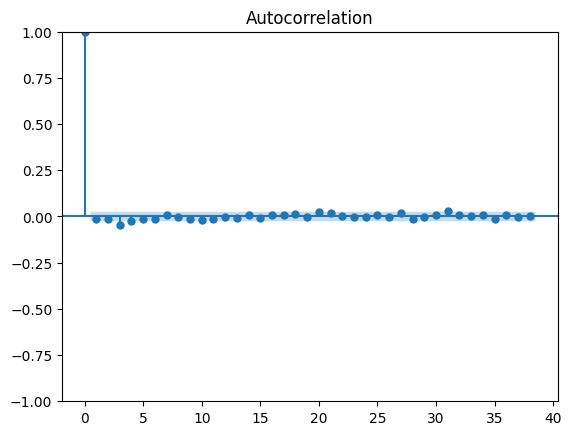

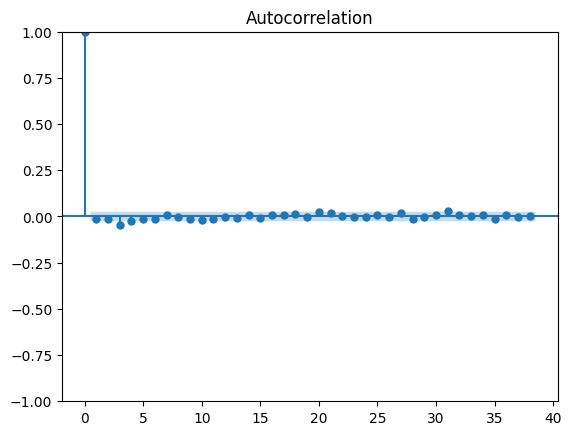

In [182]:
plot_acf(ma1model.resid)

In [183]:
print(ma2model.summary())

                               SARIMAX Results                                
Dep. Variable:                RETURNS   No. Observations:                 5857
Model:                 ARIMA(0, 0, 2)   Log Likelihood               37582.493
Date:                Wed, 21 Jan 2026   AIC                         -75156.986
Time:                        17:03:11   BIC                         -75130.285
Sample:                             0   HQIC                        -75147.702
                               - 5857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.451e-07   2.42e-06      0.101      0.919    -4.5e-06    4.99e-06
ma.L1         -0.5284      0.009    -60.066      0.000      -0.546      -0.511
ma.L2         -0.0064      0.009     -0.681      0.4

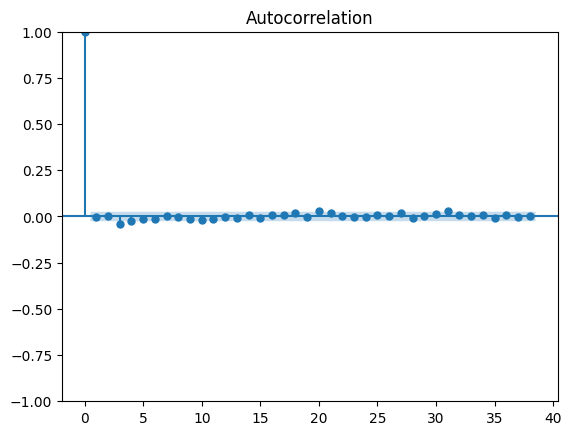

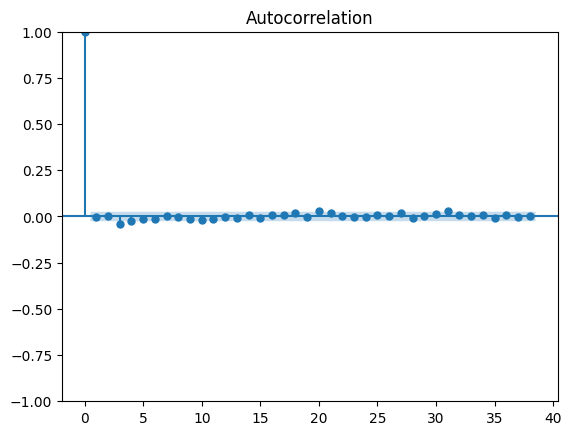

In [184]:
plot_acf(ma2model.resid)

In [185]:
ar1model = ARIMA(TTM['RETURNS'], order = (1,0,0)).fit()
ar2model = ARIMA(TTM['RETURNS'], order = (2,0,0)).fit()
ar3model = ARIMA(TTM['RETURNS'], order = (3,0,0)).fit()

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model

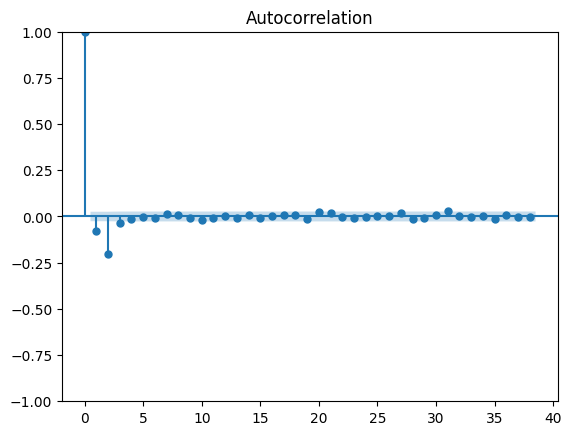

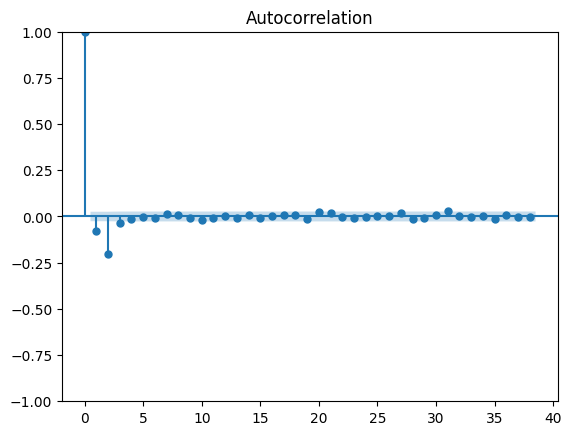

In [186]:
plot_acf(ar1model.resid)

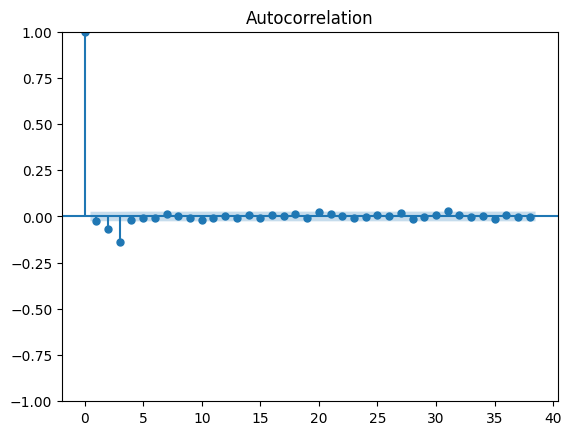

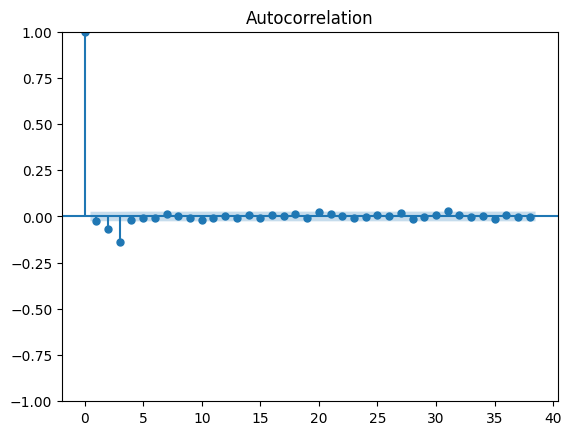

In [187]:
plot_acf(ar2model.resid)

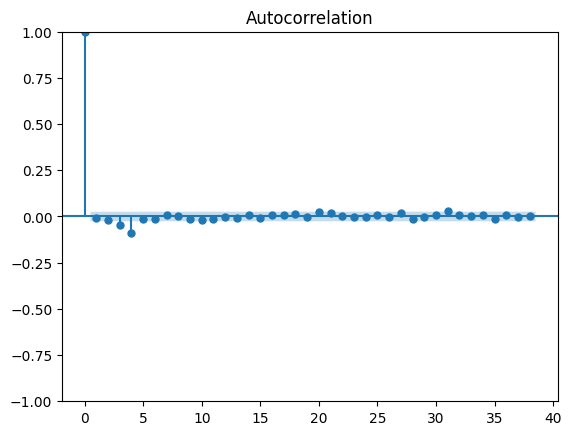

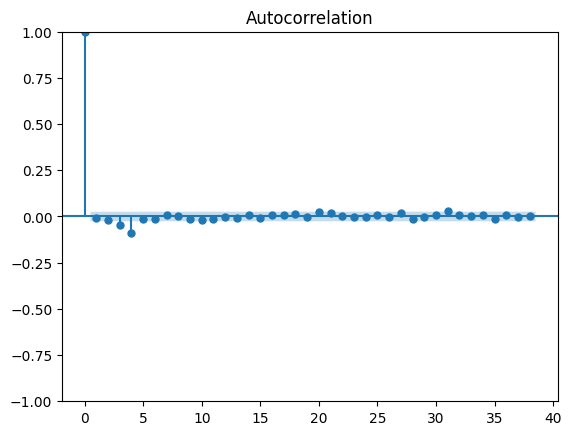

In [188]:
plot_acf(ar3model.resid)

In [189]:
onestepahead = ma2model.get_prediction(start=0)

In [190]:
onestepahead.summary_frame(alpha=0.05)

RETURNS,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-09-30 09:35:01.146,2.450625e-07,0.000448,-0.000877,0.000877
2020-09-30 09:35:01.146,-2.257878e-04,0.000408,-0.001026,0.000574
2020-09-30 09:35:01.146,-1.144914e-04,0.000399,-0.000897,0.000668
2020-09-30 09:35:01.146,-6.054043e-05,0.000397,-0.000838,0.000717
2020-09-30 09:35:01.390,-3.229766e-05,0.000396,-0.000808,0.000744
...,...,...,...,...
2020-09-30 15:59:58.097,-5.655125e-05,0.000396,-0.000832,0.000719
2020-09-30 15:59:58.598,2.601896e-04,0.000396,-0.000515,0.001036
2020-09-30 15:59:58.599,1.408692e-04,0.000396,-0.000635,0.000916
2020-09-30 15:59:59.977,-5.049720e-04,0.000396,-0.001281,0.000271


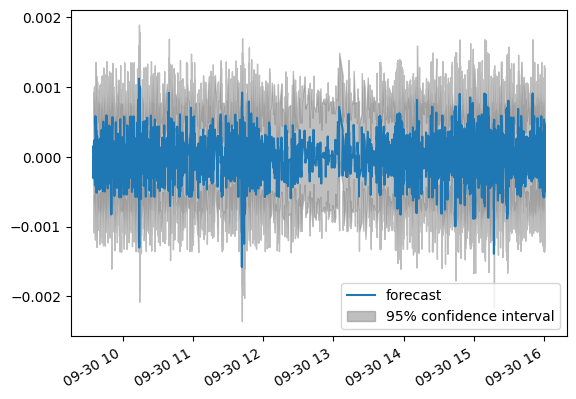

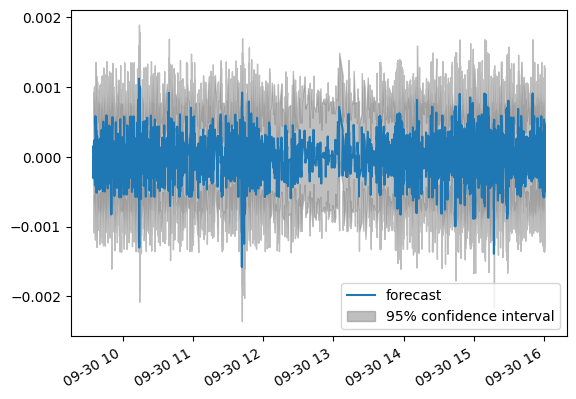

In [ ]:
plot_predict(ma2model)